# 水果分类—k-means

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)   #设置输出精度为2位


fruits = pd.read_table('fruit_data_with_colors.txt')   #读入数据

feature_names_fruits = ['height', 'width', 'mass', 'color_score']  #设置feature
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']            #设置目标分类
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']   #设置目标分类名称
#或者
#lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
#lookup_fruit_name   #输出为{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)  #设置train和test数据集

from sklearn.preprocessing import MinMaxScaler   #标准化数据，并将数据变成了array类型,不再能用head查询，也不能用于作图
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   #同时fit和transform更加便捷
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)    #设置分类标准
knn.fit(X_train_scaled, y_train)               #knn.fit, knn.score（X_train_scaled,y_train）以及knn.predict的格式都差不多
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])      #knn.predict标准格式为knn.predict(example_fruit_scaled)
#knn.predict(example_fruit_scaled)的结果为array([？])。所以后面加上[0]表示访问array得'?',然后减1变为target_names_fruits的下标
#或者照应前面的
#fruit_prediction = knn.predict(example_fruit_scaled)
#lookup_fruit_name[fruit_prediction[0]]

In [ ]:
#画kmeans的二维图
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors ，此处只能用X-train,不能用X_train_scaled. 画出来的图是二维的

In [ ]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)  #很好的作散点图方式，不同类别用不同颜色的点表示，但图是二维的，即feature=2
plt.show()  

# 用k-means回归

<IPython.core.display.Javascript object>


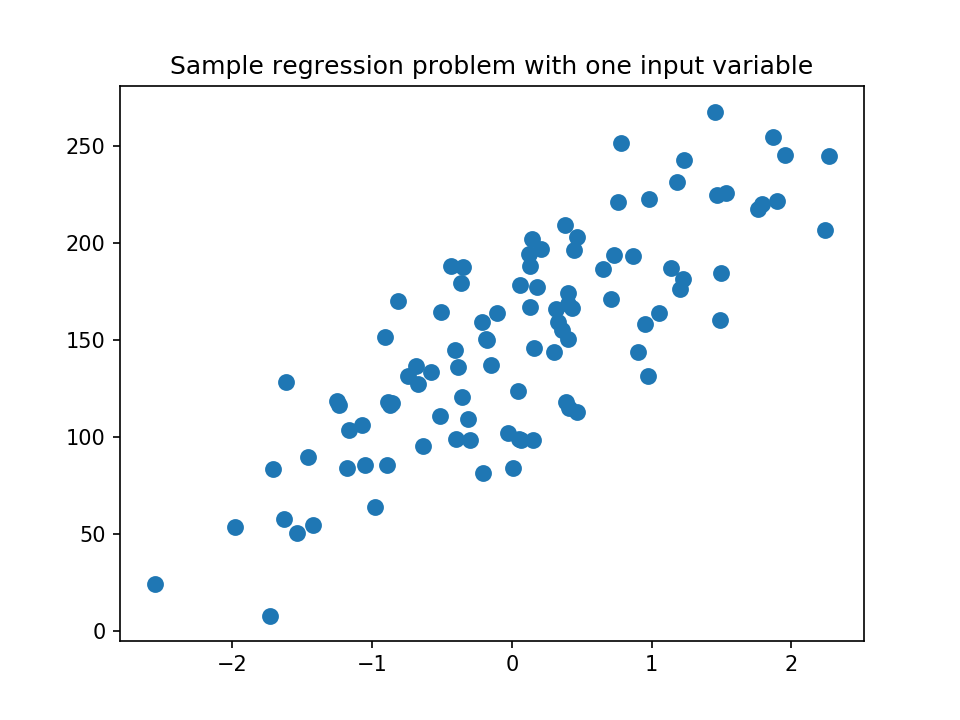

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


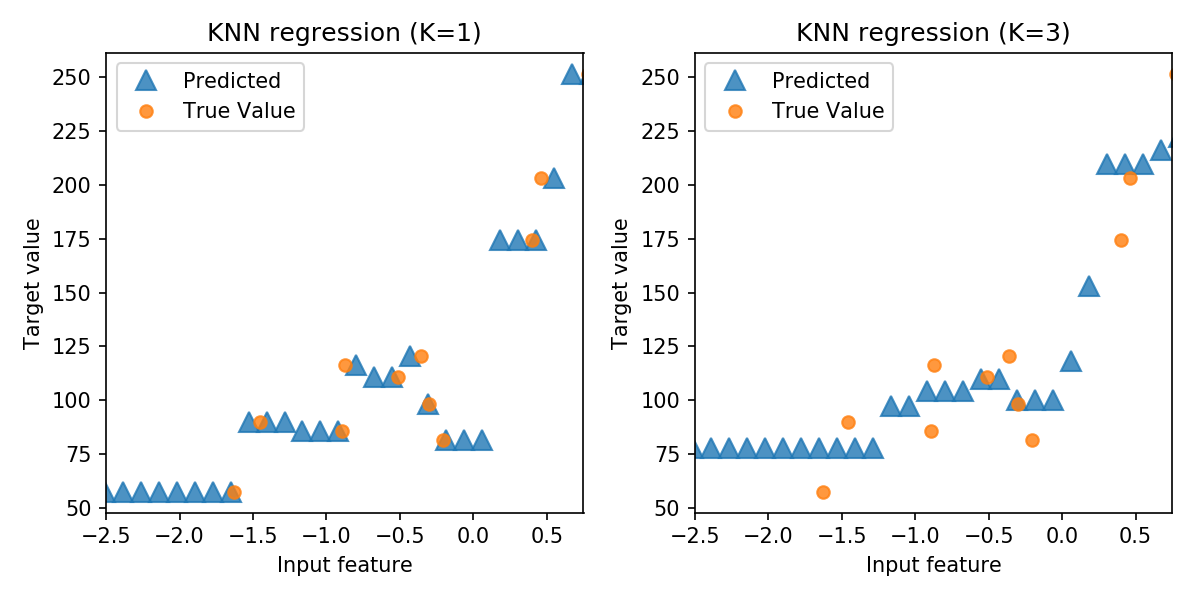

In [5]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))   #表示subplot为1行2列
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):    #超好用的zip,其中subaxes是一个1行2列的图组
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)    #此处点了fit
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

# 线性回归

In [6]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


## ridge regression

In [ ]:
from adspy_shared_utilities import load_crime_dataset
# Communities and Crime dataset   不能载入数据
(X_crime, y_crime) = load_crime_dataset()



#Ridge regression with feature normalization  有特征的正则化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge    #此处导入ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)   #此处加上alpha的值

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

## lasso regression

In [ ]:
from sklearn.linear_model import Lasso   
#Lasso regression优势在于可以把一些变量的系数变为0，对于一些变量多的问题可以做到变量的删减
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):    #对非0系数通过Key进行了从大到小的排序
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

## 多项式回归

In [ ]:
#多项式回归必须联合ridge regression使用
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)      #此处规定多项式最高系数是2
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

#  logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else，转换y的值
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))     #分裂时同时将X_train 和y_train变为数组的操作：X_fruits_2d.as.matrix()

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)       #画图操作,但导入不了画图的操作

subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### 乳腺癌logistic regression

In [4]:
from sklearn.datasets import load_breast_cancer   #可运行数据
cancer = load_breast_cancer()    #load之后用cancer.data和cancer.target也相当于X_cancer和y_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)   #读取cancer.data和cancer.target的一种方式

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
#X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)     #LogisticRegression(c=100)  C越大，调节越小，容错性越小。C越大，为0的参数多，对训练集适合性变低
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer   #可运行数据
cancer = load_breast_cancer()    #load之后用cancer.data和cancer.target也相当于X_cancer和y_cancer
cancer.keys()
#cancer

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [2]:
len(cancer['feature_names'])

30

In [23]:
#将数组变为dataframe的步骤
df=pd.DataFrame()
for i in range(30):
    df[cancer['feature_names'][i]]=cancer.data[:,i]
df['target']=cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
df['RangeIndex']=range(569)
df.set_index('RangeIndex')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
RangeIndex,,,,,,,,,,,,,,,,,,,,,
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0


In [27]:
group0=df['target'][df['target']==0]
len(group0)


212

In [28]:
group1=df['target'][df['target']==1]
len(group1)

357

In [32]:
target=pd.Series([len(group0),len(group1)],index=['benign','malignant'])
target

benign       212
malignant    357
dtype: int64

In [33]:
df.columns

Index([u'mean radius', u'mean texture', u'mean perimeter', u'mean area',
       u'mean smoothness', u'mean compactness', u'mean concavity',
       u'mean concave points', u'mean symmetry', u'mean fractal dimension',
       u'radius error', u'texture error', u'perimeter error', u'area error',
       u'smoothness error', u'compactness error', u'concavity error',
       u'concave points error', u'symmetry error', u'fractal dimension error',
       u'worst radius', u'worst texture', u'worst perimeter', u'worst area',
       u'worst smoothness', u'worst compactness', u'worst concavity',
       u'worst concave points', u'worst symmetry', u'worst fractal dimension',
       u'target', u'RangeIndex'],
      dtype='object')

In [42]:
df[df.columns[0:30]].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
df[df.columns[30]].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

# support vector machines

### linear support vector machines 

In [ ]:
from sklearn.svm import SVC
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

#fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0               #C越小，边界越大，容错性越高，调节越大。C大小变化与logistic回归一致
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
#title = 'Linear SVC, C = {:.3f}'.format(this_C)
#plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### 乳腺癌线性支持向量机 

In [5]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.90
Accuracy of Linear SVC classifier on test set: 0.88


### LinearSVC with M classes generates M one vs rest classifiers.

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

In [ ]:
#优秀的作图方式
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7) #cmap之后可忽略，cmap设定不同标签点的颜色；edgecolor设定点的边界颜色

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)   #除以w1相当于把x2当成y
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

# Kernelized Support Vector Machines

In [6]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)    #SVC缺省状态下所采用的核心是RBF kernal
#正常引用： clf=SVC(kernal='rbf', gamma=1, C=10).fit(X_train,y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [7]:
#把数据正则化处理之后结果变好了
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


In [ ]:
#gamma的说明：gamma越小，相似性半径越大，边界越光滑。在变化gamma时，C所起的作用很小
#Gamma controls how far the influence of a single trending example reaches, which in turn affects how tightly the decision boundaries end up surrounding points in the input space. 
#Small gamma means a larger similarity radius. So that points farther apart are considered similar. Which results in more points being group together and smoother decision boundaries. 
#On the other hand for larger values of gamma, the kernel value to K is more quickly and points have to be very close to be considered similar. This results in more complex, tightly constrained decision boundaries. 

# cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

## cross-validation中传递参数

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)   #表示取了4个gamma的值，成等比排列
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)
#gamma被传递到SVC计算中

In [ ]:
print(train_scores)  #输出结果为4*3矩阵，每行代表一个gamma值下3种cv的输出

In [ ]:
print(test_scores)

In [ ]:
# This code based on scikit-learn validation_plot example  作gamma变化与scores的mean和std的变化图
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)    #semilogx表示对数坐标

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [8]:
from adspy_shared_utilities import plot_decision_tree   #不能导入

ImportError: No module named adspy_shared_utilities

# decesion trees

In [ ]:
# 可视化One of the major advantages of decision trees as a supervised learning method, is that the decision rules are easily visualized and interpreted by people including users without machine learning expertise. This makes decision trees a useful choice for getting an initial understanding of what some of the more important features are likely to be for a particular prediction task. 
# feature不用正则化 Another advantage of decision trees is that you can use them without having to do feature pre-processing or normalization. Since each feature is processed independently and the splitting of the data doesn't depend on the absolute scale of the feature. The decision algorithm can operate on the original training data pretty much as is. 
# 数据集有多种类型变量时好用 So decision trees tend to work well with data sets that have a mixture of feature types-- binary, categorical or continuous and with features that are on very different scales. 


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

# 文件读写

In [ ]:
f = open("out.csv", "w")
f.write('i am here')  #只有这句能写进去, write只能写进字符串
#f.write(iris.data)
f.close()

In [ ]:
#多余的写出操作
f = open("out.txt", "w")
s=np.arange(0,59)
#X = fruits[['height', 'width', 'mass', 'color_score']]
#y = fruits['fruit_label']
for i in s:
#    print >> f, "%d %s %s %d %f %f %f %f" % (fruits[fruit_label][i],fruits[fruit_name][i])
     print("%d %s" % (fruits['fruit_label'][i],fruits['fruit_name'][i]),file=f)
f.close()

In [46]:
#文件读入
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

flower = pd.read_table('flower.txt')  #txt各项之间要以制表符分开
flower.head()

,length,width,length.1,width.1
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6 3.1 1.5 0.2,NaN,NaN,NaN
4,5. 3.6 1.4 0.2,NaN,NaN,NaN


In [47]:
flower['length'].head()

0                   5.1
1                   4.9
2                 4.7  
3    4.6  3.1  1.5  0.2
4    5.   3.6  1.4  0.2
Name: length, dtype: object

In [ ]:
#在所学课程中只有SVM和decision tree用于multiclass的分类

In [9]:
#可用于解决multiclass问题
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [10]:
#未见有multiclass的描述
#classes_ : array or list of array of shape (n_classes,)Class labels for each output.  输出里有这句话


from sklearn.neural_network import MLPClassifier
MLPClassifier?

In [3]:
from sklearn.svm import SVC
SVC?   #The multiclass support is handled according to a one-vs-one scheme.  里面没有multiclass的参数描述